In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# load data
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

len(train_data), len(train_labels), len(test_data), len(test_labels)

4422102/4422102 [==============================] - 0s 0us/step


(60000, 60000, 10000, 10000)

In [3]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
train_data[0], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

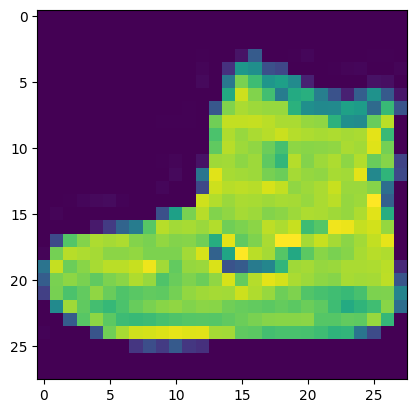

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

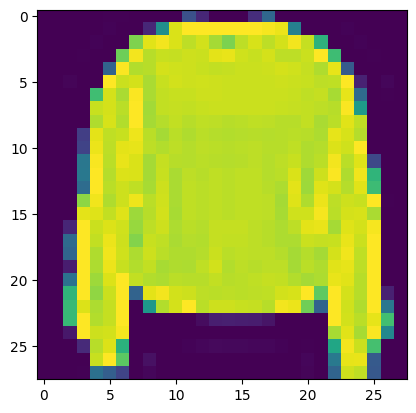

In [6]:
plt.imshow(train_data[7])

In [7]:
train_labels.shape, tf.unique(train_labels)

((60000,),
 Unique(y=<tf.Tensor: shape=(10,), dtype=uint8, numpy=array([9, 0, 3, 2, 7, 5, 1, 6, 4, 8], dtype=uint8)>, idx=<tf.Tensor: shape=(60000,), dtype=int32, numpy=array([0, 1, 1, ..., 2, 1, 5], dtype=int32)>))

In [8]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'Dress')

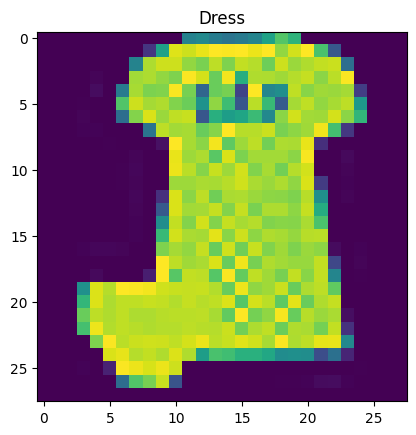

In [9]:
plt.imshow(train_data[70])
plt.title(class_names[train_labels[70]])

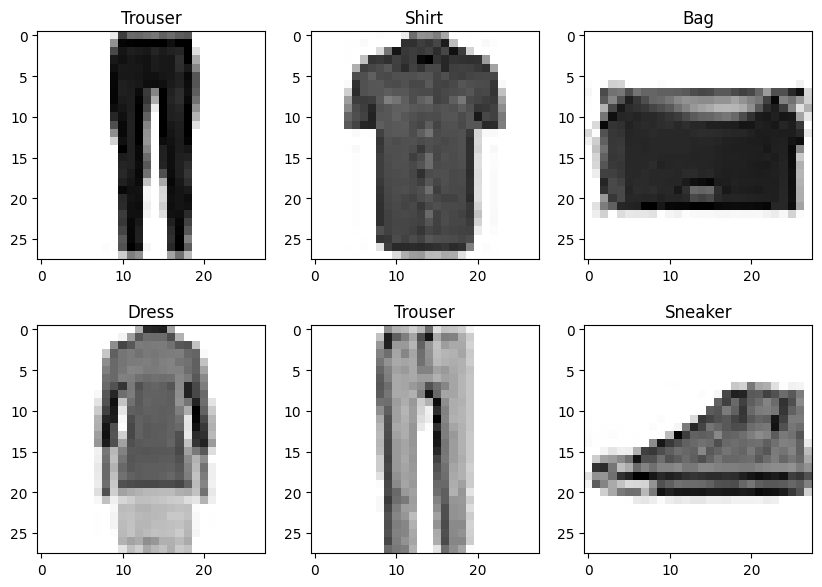

In [10]:
# plot multiple random images from the train data
import random

plt.figure(figsize=(10,7))

for i in range(6):
  ax = plt.subplot(2, 3, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])

In [11]:
# Create base model
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
], name='model_1')

# compile
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# fit
model_1_history = model_1.fit(train_data,
                              train_labels,
                              epochs=10,
                              validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 3ms/step - loss: 2.4835 - accuracy: 0.1005 - val_loss: 2.2787 - val_accuracy: 0.1097
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2127 - accuracy: 0.1392 - val_loss: 2.1787 - val_accuracy: 0.1496
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9431 - accuracy: 0.2116 - val_loss: 1.7844 - val_accuracy: 0.2322
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7362 - accuracy: 0.2679 - val_loss: 1.6873 - val_accuracy: 0.3111
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6511 - accuracy: 0.3066 - val_loss: 1.6024 - val_accuracy: 0.3233
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5661 - accuracy: 0.3465 - val_loss: 1.5337 - val_accuracy: 0.3577
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5304 - accuracy: 0.3580 - val_loss: 1.5269 - val_accuracy

In [12]:
# Data normalization
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [13]:
# Create model_2
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
], name='model_2')

# Compile
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# Fit the model
model_2_history = model_2.fit(train_data_norm,
                              train_labels,
                              epochs=10,
                              validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.0467 - accuracy: 0.6347 - val_loss: 0.7126 - val_accuracy: 0.7573
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6346 - accuracy: 0.7825 - val_loss: 0.6238 - val_accuracy: 0.7941
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5798 - accuracy: 0.8033 - val_loss: 0.6184 - val_accuracy: 0.7841
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5564 - accuracy: 0.8103 - val_loss: 0.5847 - val_accuracy: 0.8034
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5436 - accuracy: 0.8140 - val_loss: 0.5906 - val_accuracy: 0.8048
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5343 - accuracy: 0.8174 - val_loss: 0.5921 - val_accuracy: 0.8005
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5278 - accuracy: 0.8192 - val_loss: 0.5876 - val_accuracy:

<Axes: title={'center': 'Norm Data'}>

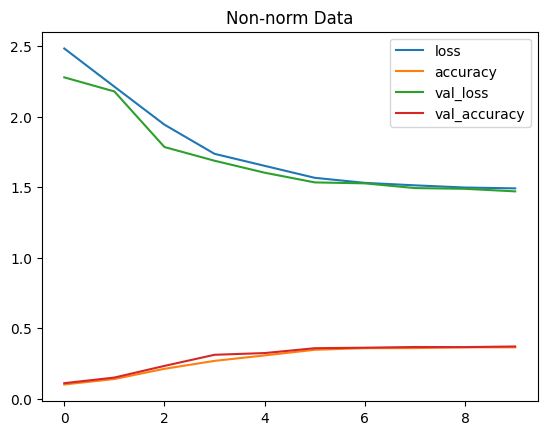

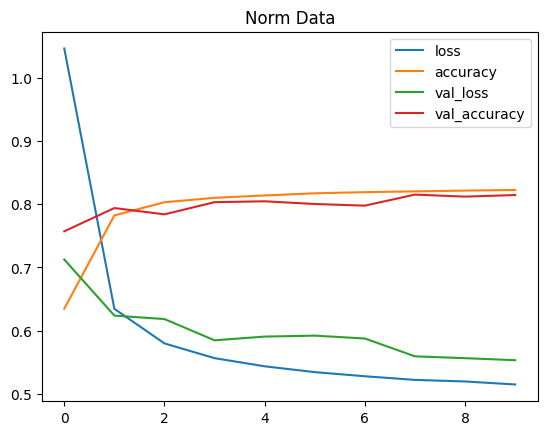

In [14]:
# ploting data loss curve for norm-data and non_norm data
import pandas as pd
pd.DataFrame(model_1_history.history).plot(title='Non-norm Data')
pd.DataFrame(model_2_history.history).plot(title='Norm Data')

In [15]:
# finding ideal learning rate
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
], name='model_3')

# Compile
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
model_3_history = model_3.fit(train_data_norm,
                              train_labels,
                              epochs=40,
                              validation_data=(test_data_norm, test_labels),
                              callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2476 - accuracy: 0.5609 - val_loss: 0.7679 - val_accuracy: 0.7259 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6588 - accuracy: 0.7752 - val_loss: 0.6383 - val_accuracy: 0.7863 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5853 - accuracy: 0.8014 - val_loss: 0.6122 - val_accuracy: 0.7857 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5587 - accuracy: 0.8086 - val_loss: 0.5866 - val_accuracy: 0.7959 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5436 - accuracy: 0.8115 - val_loss: 0.5683 - val_accuracy: 0.8025 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5315 - accuracy: 0.8159 - val_loss: 0.5925 - val_accuracy: 0.7886 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7s

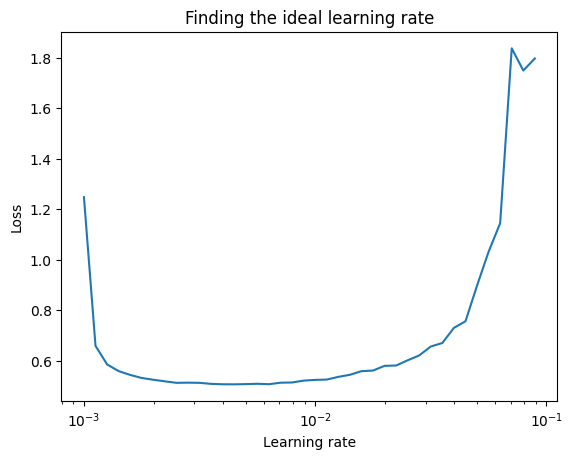

In [16]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, model_3_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [17]:
# Creating model_4
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

], name='model_4')

# Compile
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.003),
                metrics=['accuracy'])

# Fit the model
model_4_history = model_4.fit(train_data_norm,
                              train_labels,
                              epochs=20,
                              validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5303 - accuracy: 0.3917 - val_loss: 1.2831 - val_accuracy: 0.4513
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1260 - accuracy: 0.5172 - val_loss: 0.9915 - val_accuracy: 0.5634
Epoch 3/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.9178 - accuracy: 0.6058 - val_loss: 0.9281 - val_accuracy: 0.6256
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7858 - accuracy: 0.7139 - val_loss: 0.7528 - val_accuracy: 0.7396
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6918 - accuracy: 0.7573 - val_loss: 0.7221 - val_accuracy: 0.7467
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6590 - accuracy: 0.7646 - val_loss: 0.6958 - val_accuracy: 0.7550
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6418 - accuracy: 0.7695 - val_loss: 0.6748 - val_accuracy:

<Axes: >

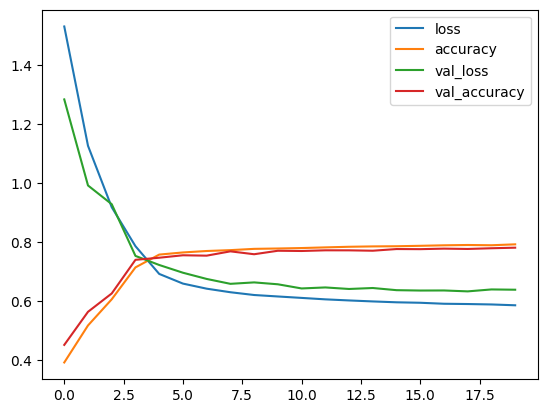

In [18]:
pd.DataFrame(model_4_history.history).plot()

In [19]:
# Increasing Complexity
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
], name='model_5')

# Compile
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# fit the model
model_5_history = model_5.fit(train_data_norm,
                              train_labels,
                              epochs=20,
                              validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5555 - accuracy: 0.8081 - val_loss: 0.4705 - val_accuracy: 0.8291
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4066 - accuracy: 0.8555 - val_loss: 0.4582 - val_accuracy: 0.8386
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3697 - accuracy: 0.8673 - val_loss: 0.4056 - val_accuracy: 0.8505
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3496 - accuracy: 0.8745 - val_loss: 0.3983 - val_accuracy: 0.8577
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3332 - accuracy: 0.8793 - val_loss: 0.4025 - val_accuracy: 0.8586
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3187 - accuracy: 0.8827 - val_loss: 0.4034 - val_accuracy: 0.8505
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3107 - accuracy: 0.8863 - val_loss: 0.3870 - val_accuracy:

<Axes: >

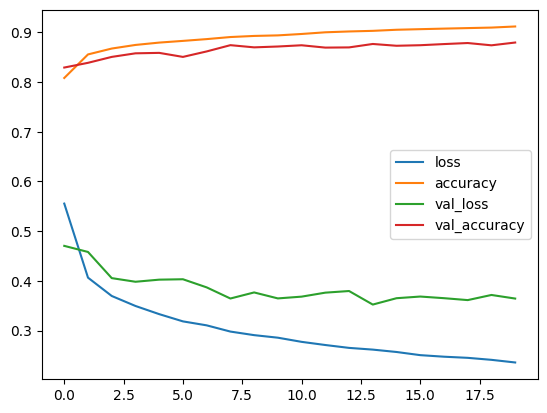

In [20]:
pd.DataFrame(model_5_history.history).plot()

In [21]:
model_5_evaluation = model_5.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3645 - accuracy: 0.8794


In [22]:
# let's change the data type of train_data(uint8->float32)
train_data_cast = tf.cast(train_data_norm, dtype=tf.float32)
test_data_cast = tf.cast(test_data_norm, dtype=tf.float32)
train_data_cast[0]

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 

In [23]:
# Create a model as model_5
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
], name='model_6')

# Compile
model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# Fit the model
model_6_history = model_6.fit(train_data_cast,
                              train_labels,
                              epochs=20,
                              validation_data=(test_data_cast, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 0.5325 - accuracy: 0.8153 - val_loss: 0.4440 - val_accuracy: 0.8420
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3992 - accuracy: 0.8567 - val_loss: 0.4791 - val_accuracy: 0.8361
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3666 - accuracy: 0.8666 - val_loss: 0.4090 - val_accuracy: 0.8549
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3459 - accuracy: 0.8755 - val_loss: 0.3862 - val_accuracy: 0.8613
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3312 - accuracy: 0.8792 - val_loss: 0.3856 - val_accuracy: 0.8610
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3173 - accuracy: 0.8837 - val_loss: 0.3913 - val_accuracy: 0.8581
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3095 - accuracy: 0.8862 - val_loss: 0.3925 - val_accuracy

In [24]:
# Create a model, model_7
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),

    tf.keras.layers.Dense(10, activation='softmax')
], name='model_7')

# Compile
model_7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# Fit the model
model_7_history = model_7.fit(train_data_cast,
                              train_labels,
                              epochs=20,
                              validation_data=(test_data_cast, test_labels))

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5681 - accuracy: 0.8012 - val_loss: 0.4399 - val_accuracy: 0.8420
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3960 - accuracy: 0.8565 - val_loss: 0.4633 - val_accuracy: 0.8363
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3576 - accuracy: 0.8691 - val_loss: 0.4015 - val_accuracy: 0.8519
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3330 - accuracy: 0.8786 - val_loss: 0.3936 - val_accuracy: 0.8607
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3177 - accuracy: 0.8833 - val_loss: 0.3802 - val_accuracy: 0.8609
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3005 - accuracy: 0.8889 - val_loss: 0.4005 - val_accuracy: 0.8540
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2916 - accuracy: 0.8924 - val_loss: 0.3840 - val_accuracy:

In [25]:
model_7_evaluation = model_7.evaluate(test_data_cast, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3722 - accuracy: 0.8812


Here we able to get accuracy 88%++

<Axes: >

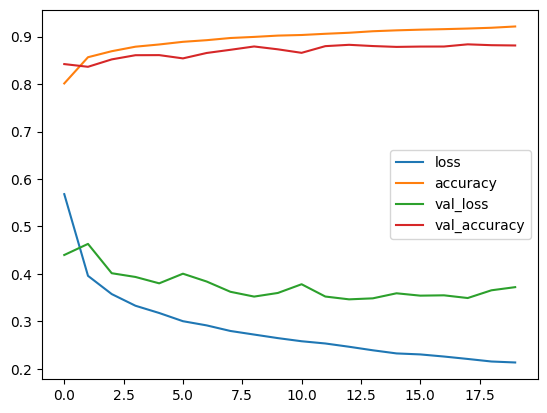

In [26]:
pd.DataFrame(model_7_history.history).plot()

In [27]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)


In [28]:
# Make predictions with the most recent model
y_probs = model_7.predict(test_data_cast) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.98752095e-05, 1.22152094e-10, 7.46116502e-09, 2.54558934e-08,
        1.82561688e-10, 2.40186026e-04, 9.94205465e-08, 1.97546948e-02,
        6.21829810e-10, 9.79985118e-01],
       [2.22858762e-05, 1.28323768e-10, 9.94349182e-01, 2.12647322e-08,
        5.58360247e-03, 4.20001707e-12, 4.49935105e-05, 4.59431992e-14,
        2.24917862e-09, 3.17455667e-16],
       [1.39399527e-12, 1.00000000e+00, 8.75837760e-13, 1.15950947e-11,
        5.64724829e-12, 2.12648769e-21, 2.04523339e-14, 5.35905410e-37,
        8.48077927e-11, 1.28734649e-29],
       [1.02446025e-08, 1.00000000e+00, 5.07735451e-11, 2.91695752e-08,
        8.19951551e-10, 8.84376909e-17, 5.65294367e-10, 2.74761486e-25,
        1.92088141e-08, 7.82655233e-22],
       [2.71811616e-02, 1.09721014e-07, 5.08673815e-03, 1.53108394e-05,
        2.84382259e-03, 2.14806803e-08, 9.64586556e-01, 2.46138915e-10,
        2.86149618e-04, 9.25729077e-11]], dtype=float32)

In [29]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [30]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

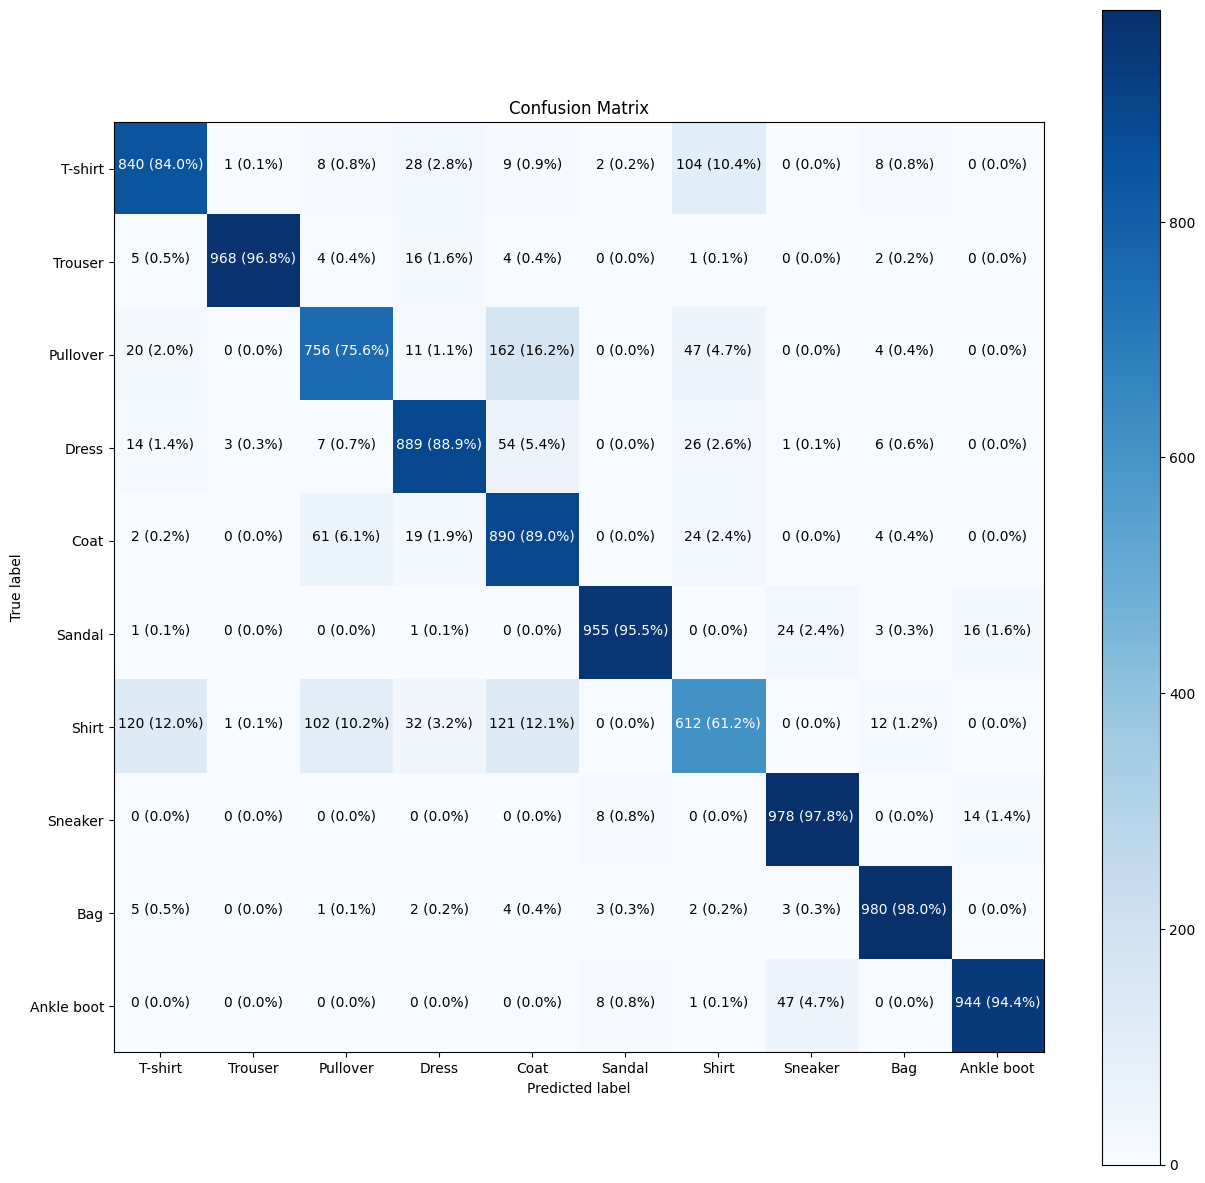

In [31]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [55]:
# plot test 3 images with prediction
def plot_image_prediction(model, images, truth_labels, classes):
  '''
  Pick 3 random images from the images set and plot these with prediction.

  Arg:
  ---
  model: The trained model.
  images: test data set.
  truth_labels: labels of test dataset.
  classes: name of labels.
  '''
  plt.figure(figsize=(10,7))
  for i in range(3):
    # setup plot pattern
    ax = plt.subplot(1, 3, i+1)
    # setup random integer.
    rand_int=random.choice(range(len(images)))
    # create predictions and targets
    target_image = images[rand_int]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[truth_labels[rand_int]]
    # plot the target image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # change the color of title depending on prediction.
    if pred_label==true_label:
      color='green'
    else:
      color='red'

    plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(
        pred_label,
        100*tf.reduce_max(pred_probs),
        true_label
    ), color=color)

1/1 [==============================] - 0s 18ms/step


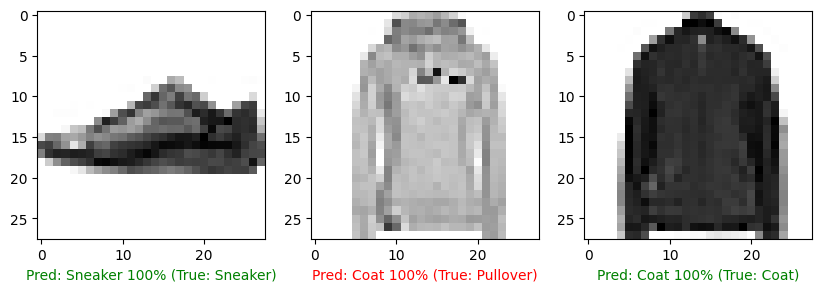

In [58]:
plot_image_prediction(model_7, test_data, test_labels, class_names)